# Chapter 2: Multi-armed Bandits

What separates reinforcement learning (RL) from other types of machine learning is the incorparation of feedback of an agents actions from the environment that is used to guide the agent towards ever '_better_' behaviour. To discover which actions produce the best behaviour an agent must explore the action space before exploiting their new found knowledge.

In [74]:
# Base packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 8]
from IPython.display import Latex

# Arm, Bandit and BanditAgent classes
from arm import *
from bandit import *
from banditAgents import *

## k-Armed Bandit Problem
Imagine a k-armed bandit where at each time step an agent pulls the arm of bandit. When the agent pulls an arm they recieve a reward. Different arms have different, seemingly random rewards. How should an agent figure out which arm to pull in order to maximise their long term returns?

In the k-armed bandit problem each of the k arms/actions has some corresponding random reward associated with it, with some expected value. The action selected at time step $t$ is denoted $A_t$ and produces some reward $R_t$. Given this, the value of an arbitray action $a$ at time step $t$ is the expected reward given that $a$ has been selected and is denoted by the action-values: 

\begin{equation}
q_{*}(a) =\mathbb{E}[R_t | A_t = a]
\end{equation}

If the value of each action was known, then winning would be a piece of cake; just keep on pulling the arm with highest value and watch the dollars stream out of the bandit. Unfortunately it isn't this simple, the only information available about the reward distributions for each arm is through trial-and-error. The estimated value of an arm/action $a$ at time step $t$ is denoted as $Q_t(a)$.

Now, for a agent to learn which actions relate to good behaviour, and plenty of dollars tinking on the collection plate, the agent has to maintain estimates of the action-values $Q_t(a)$. By maintaining these estimates the agent knows that at each time step there will be one that has the highest value, known as the _greedy_ action. By choosing this action the agent is exploiting their current knowledge.

However, it may be the case that the agent's knowledge of the reward distributions of the bandit is relatively limited; there may be an arm that hasn't been tried yet that is in fact the one that makes it rain, it's just that the agent hasn't discovered it yet. To determine the best actions to take the agent must _explore_. Exploring enables the agent to find current non-greedy actions that are in fact the optimal action. Exploitation may maximise the agent's short-term rewards, but exploration will ensure that long-term rewards are greater.

A simple method to estimate the action-values $Q_t(a)$ is by averaging the material rewards recieved up until a certain time step $t$ for a particular action $a$:

\begin{equation}
Q_t(a) = \frac{\text{sum of rewards when } a \text{ taken prior to } t}{\text{number of times }a \text{ taken prior to }t}
\end{equation}

To select the _greedy_ action at a time step $t$ the agent can just select the action with highest estimated value, or in other words:

\begin{equation}
A_t = \underset{a}{\operatorname{argmax}} Q_t(a)
\end{equation}


However this only exploits the current knowledge of the environment; there might be better choices, the agent just needs to explore a little to find them. To do this the agent could select the best option at each time step $t$ with probability $1 - \epsilon$, where $\epsilon \in [0,1]$ is some small value. This leaves some other small probability $\epsilon$ that the agent will choose a random action, and will at least explore indiscriminatively and independently of the action-value estimates. This is known as an $\epsilon$_greedy_ strategy. 

The beauty of this strategy that in the limit of time steps every action will be selected infinitely often, thus ensuring that the action-value estimates $Q_t(a)$ will converge to $q_{*}(a)$.

## 10-Armed Bandit Proving Ground
To test the above $\epsilon$-greedy strategy, plus more, the imported banditAgents classes can be used to numerically investigate their ability to beat the bandit. The n-armed bandit in this case will have 10 arms where all arms have either:
> __Stationary__ reward distrbutions, with gaussian returns $N(\mu,1)$, with $\mu \in [-10,10]$

or

> __Non-stationary__ reward distribution, again with gaussian returns $N(\mu,1)$, with $\mu \in [-10,10]$. However, in the non-stationary case the mean of each arm $\mu$ follows a gaussian random walk modelled by $N(0,\sigma^2)$ with $\sigma^2 \in [0.25,0.5]$

Examples of the stationary reward distribution and the random walk followed by a non-stationary bandit are shown below:

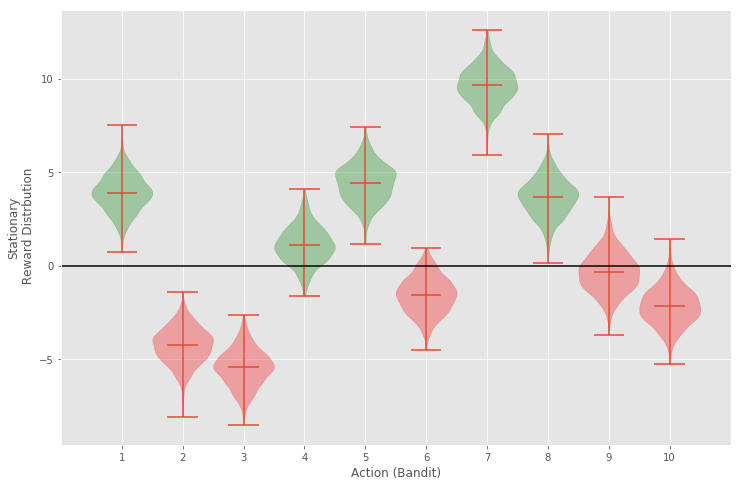

In [75]:
np.random.seed(123)
stat_bandit = nArmedBandit(10)
stat_bandit.plotBandit()

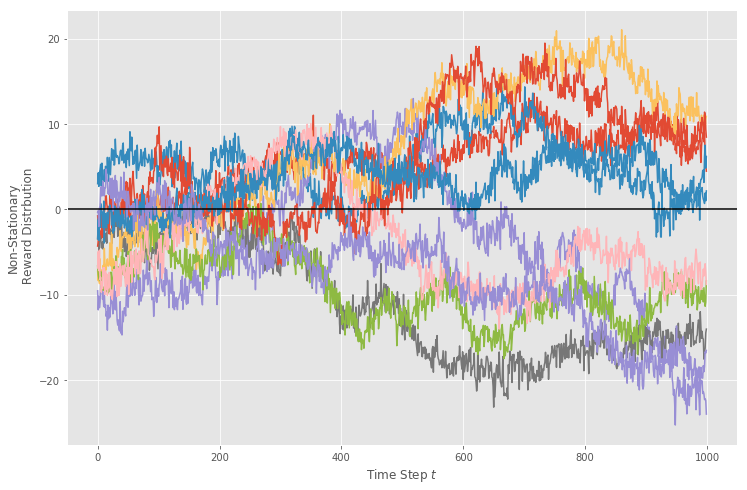

In [79]:
np.random.seed(1)
nonstat_bandit = nArmedBandit(10, isStationary=False)
nonstat_bandit.plotBandit()

For this particular stationary case there are 5 arms that will provide long-term positive rewards, shown in green, and 5 that wont shown in red. Given these, the best arm to pull to maximise the rewards is arm 7, but the agent has no way to know this without a bit of experimentation.

For the non-stationary bandit, the random walks mean that the agent is constantly having to reassess which is the best arm, and requires a better strategy in order to handle this evolving game. For example the 'orange' arm initially has a reward distribution with a mean below zero, but after 1000 time steps it has the highest. Improvise, adapt, overcome.

### $\epsilon$-greedy
To begin with, stationary 10-armed bandits will be played by agents with different $\epsilon$-greedy. For all learning runs the episode will last 1000 time steps and the average rewards and optimal actions will be averaged over 1000 episodes. The average rewards show how quickly and to what level the agents can play the game, while the % optimial action indicates how often an agent pulls the best arms. After each episode the $Q$-values and any other episode specific parameters of the agents are reset.

The below plot compares only the $\epsilon$-greedy method metioned previously, for varying values of $\epsilon$.

In [81]:
baseBandit = nArmedBandit(10) 
epsilons = [0.25, 0.1, 0.01, 0.0]
bandits_list_1 = [SimpleBandit(n=10, bandit=baseBandit, epsilon=eps) for eps in epsilons]
avg_rewards_1, optimal_actions_1 = learnMultiEpisodes(bandits_list)

Executing episode: 0
Executing episode: 100
Executing episode: 200
Executing episode: 300
Executing episode: 400
Executing episode: 500
Executing episode: 600
Executing episode: 700
Executing episode: 800
Executing episode: 900


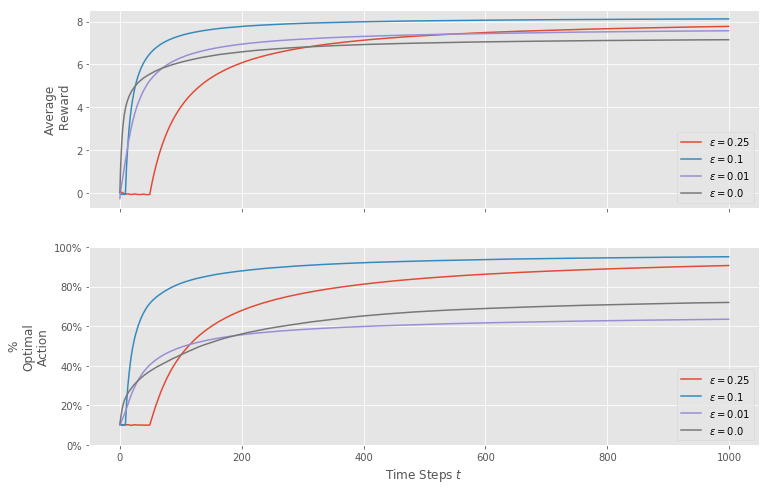

In [83]:
bandit_names_1 = ["$\epsilon = " + str(eps) + "$" for eps in epsilons]
plotAgentsLearning(avg_rewards_1, optimal_actions_1, bandit_names_1)

Given the different values of the random exploration $\epsilon$ all the methods derived there action-values from the sample-averaging technique described above. From the top plot of average rewards the greedy agent appears to learn and improve it's rewards the quickest but levels off relatively quickly. The bottom plot shows that although it learnt to play well quickly, the greedy agent didn't learn to play optimally, only managing to make the optimal decision approximately 75% of the time. It is also a similar story for the $\epsilon$-greedy agent with $\epsilon=0.01$. For both of these agents they are not able to explore the action space and its rewrds enough in order to find the optimal arm to pull in each episode.

For the agent with $\epsilon=0.1$ it appears to have had the best balance of exploration-vs-exploitation. The steep curve in the both plots reveal that it was able to learn on average the 1000 bandits very quickly, and by the end of each episode was making the optimal decision about 90% of the time.

The learning for the agent with $\epsilon=0.25$ finished each episode with similar but slightly less optimal behaviour compared to the $\epsilon=0.1$ agent, but struggled at the beginning of episodes. The reason for this maybe due to a the relatively large chance of choosing a random action, giving rise to a heating up period at the start of episodes where it acts very erratically while it updates it's action-values that dictate its behavior.

### Incremental Implementation
The $\epsilon$-greedy agents assessed so far all estimate their action-values as sample averages, using the rewards seen per action divided by the number of times that an action is taken. Their learning algorithm is as follows:

>Initialize actions $a=1,...,k$:
\begin{equation}
Q(a) \leftarrow 0 \\
N(a) \leftarrow 0
\end{equation}

>Repeat forever:
\begin{equation}
A \leftarrow \left\{
           \begin{array}{ll}
               \underset{a}{\operatorname{argmax}} Q_t(a), \text{with prob. } 1-\epsilon\\
               \text{random action, with prob. } \epsilon\\
           \end{array}
    \right.\\
R \leftarrow bandit(A)\\
N(A) \leftarrow N(A) + 1\\
Q(A) \leftarrow Q(A) + \frac{1}{N(A)}[R(A) - Q(A)]\\
\end{equation}

This makes the updating of the estimates follow the pattern: $NewEstimate \leftarrow OldEstimate + StepSize[Target - OldEstimate]$. The term $[Target - OldEstimate]$ is the error of current esimate of the value of an action compared to the material reward seen by taking that action, and is reduced by taking steps towards the $Target$. The step-sizes so far have just been how many times a particular action has been taken, i.e. $\frac{1}{N(A)}$, but other options are possible. A more general approach is to have a function that controls the step-size, denoted $\alpha_t(a)$. It's common however to have a constant step-size, or learning rate $\alpha \in (0,1]$. 

The plots below explore the learning rates for different constant step-sizes $\alpha$, as well as the case previous evaluated above where $\alpha_t(a) = \frac{1}{N_t(a)}$, where $N_t(a)$ is the number of times an action $a$ has been taken after $t$ time steps.

In [87]:
baseBandit = nArmedBandit(10) 
alphas = np.arange(0.25,1.25,0.25)
bandits_list_2 = [WeightedBandit(n=10, bandit=baseBandit, epsilon=0.1, alpha=a) for a in alphas] + [SimpleBandit(n=10, bandit=baseBandit, epsilon=0.1)]

avg_rewards_2, optimal_actions_2 = learnMultiEpisodes(bandits_list_2)

Executing episode: 0
Executing episode: 100
Executing episode: 200
Executing episode: 300
Executing episode: 400
Executing episode: 500
Executing episode: 600
Executing episode: 700
Executing episode: 800
Executing episode: 900


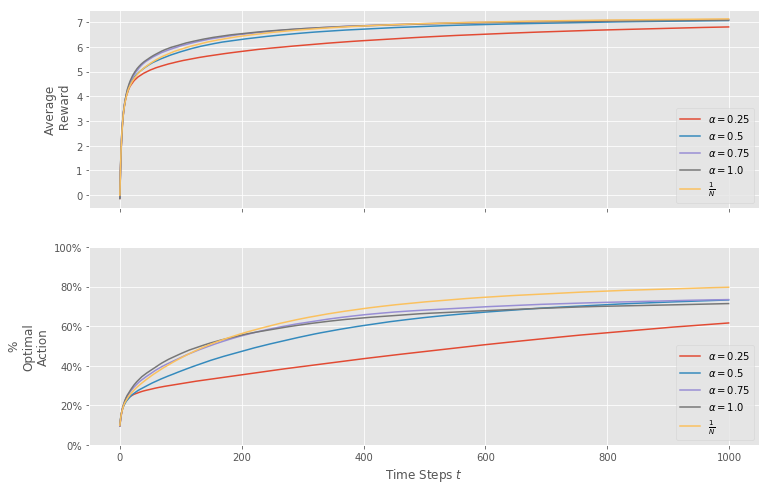

In [88]:
bandit_names_2 = ["$\\alpha = " + str(round(a, 2)) + "$" for a in alphas] + ["$\\frac{1}{N}$"]
plotAgentsLearning(avg_rewards_2, optimal_actions_2, bandit_names_2)

The different step sizes $\alpha$ all prodoce sub-par learning results compared to averging method $\frac{1}{N_t(a)}$. This is no suprise as the averaging method produces the most accurate estimate of the underlying action-values for each arm.

However, this is only applicable where the underlying reward distributions for the arms is stationary. For non-stationary bandits it makes more sense to give greater weight to more recent rewards. Using a constant step-size parameter $\alpha \in (0,1]$ will do this with the the following update rate rule for $Q_t$ (intermediate calculations are skipped for brevity):

\begin{align*}
Q_{t+1} &= Q_{t} + \alpha[R_{t} - Q_{t}] \\
&...\\
Q_{t+1} &= (1-\alpha)^n Q_1 + \sum_{i=1}^{t}\alpha(1-\alpha)^{t-1}R_i\\
\end{align*}

This update gives an exponentially weighted average of the rewards, where the step-size $\alpha$ controls the weight of rewards in the action-value calculations, with more weight give to recent rewards. This is all the more critical for the non-stationary bandits whos effect can be seen below.

In [210]:
baseBandit = nArmedBandit(10) 
alphas = np.arange(0.25,1.25,0.25)
bandits_list_3 = [WeightedBandit(n=10, bandit=baseBandit, epsilon=0.1, alpha=a) for a in alphas] + [SimpleBandit(n=10, bandit=baseBandit, epsilon=0.1)]

avg_rewards_3, optimal_actions_3 = learnMultiEpisodes(bandits_list_3, isStationary=False)

Executing episode: 0
Executing episode: 100
Executing episode: 200
Executing episode: 300
Executing episode: 400
Executing episode: 500
Executing episode: 600
Executing episode: 700
Executing episode: 800
Executing episode: 900


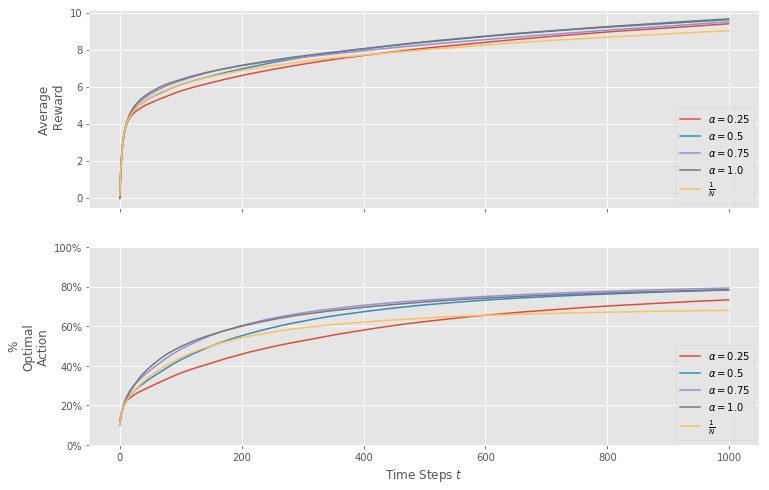

In [211]:
bandit_names_3 = ["$\\alpha = " + str(round(a, 2)) + "$" for a in alphas] + ["$\\frac{1}{N}$"]
plotAgentsLearning(avg_rewards_3, optimal_actions_3, bandit_names_3)

In the non-stationary bandit setting the sampling averaging agent is outperformed by all the weighted-averaging agents. In particlar agents that give the greatest weight to recent rewards, i.e. $\alpha=1,0.75$ perform the best. This is shown all the more in the below plots. This time the episode length is set to 10,000. The adaptability of the constant step-size methods is magnified as the random walks of the underlying reward distributions have greater time to drift from their initial starting means.

In [93]:
baseBandit = nArmedBandit(10) 
alphas = np.arange(0.25,1.25,0.25)
bandits_list_4 = [WeightedBandit(n=10, bandit=baseBandit, epsilon=0.1, alpha=a) for a in alphas] + [SimpleBandit(n=10, bandit=baseBandit, epsilon=0.1)]

avg_rewards_4, optimal_actions_4 = learnMultiEpisodes(bandits_list_4, isStationary=False, episode_len=10000)

Executing episode: 0
Executing episode: 100
Executing episode: 200
Executing episode: 300
Executing episode: 400
Executing episode: 500
Executing episode: 600
Executing episode: 700
Executing episode: 800
Executing episode: 900


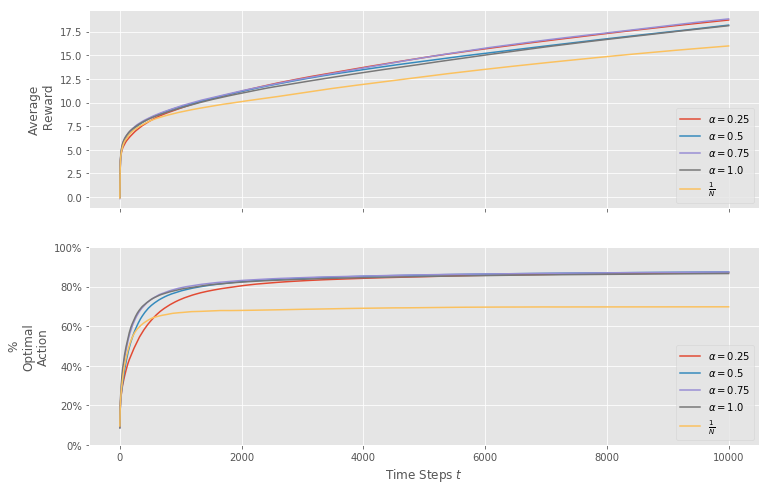

In [94]:
bandit_names_4 = ["$\\alpha = " + str(round(a, 2)) + "$" for a in alphas] + ["$\\frac{1}{N}$"]
plotAgentsLearning(avg_rewards_4, optimal_actions_4, bandit_names_4)

### Optimistic Initial Values / Hot-Start Q-Values
In all the agents analysed so far the initial action-values $Q_0$ are set to zero. This biasing can inhibit exploration. In the case of sample-averaging the bias is overcome once every action is tried at least once, but for the constant step-size agents the biases will remain, although they will decrease over time.

The choice of the initial $Q_0(a)$ are in fact paramters of the agent chosen by the instructor. However, by setting these initial values artifically high it can encourange early exploration as the agent selects sub-optimal actions, only to find out that they are in fact bad and correct for them. If the initial action-values are set high enough then the rewards seen by an agent will be less than the initial optimistic values, and will be corrected for as an episode plays out.

Being an outside observer, or prehaps the engineer that actually built the bandit machines, we know that the range in which the initial reward means lie is $[-10,10]$, so the optimistic actions-values can be set to $Q_0(a)=10, \forall a$. This means that even for the most profitable arm the initial action-values will be far to optimistic. The plots of this are shown below.

In [146]:
baseBandit = nArmedBandit(10) 
bandits_list_5 = [WeightedBandit(n=10, bandit=baseBandit, epsilon=0, hot_start=10), 
                  WeightedBandit(n=10, bandit=baseBandit, epsilon=0.1)]

avg_rewards_5, optimal_actions_5 = learnMultiEpisodes(bandits_list_5)

Executing episode: 0
Executing episode: 100
Executing episode: 200
Executing episode: 300
Executing episode: 400
Executing episode: 500
Executing episode: 600
Executing episode: 700
Executing episode: 800
Executing episode: 900


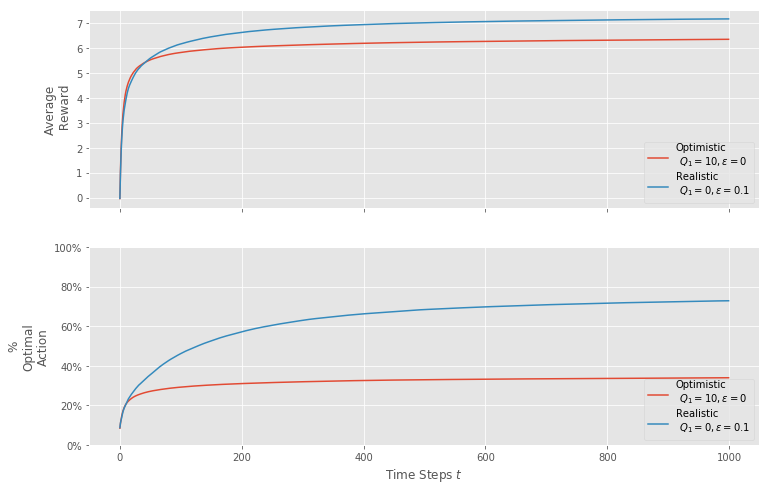

In [175]:
bandit_names_5 = ["Optimistic\n $Q_1=10, \epsilon=0$", "Realistic\n $Q_1=0, \epsilon=0.1$"]
plotAgentsLearning(avg_rewards_5, optimal_actions_5, bandit_names_5)

It appears that in this particular example that optimistic agent is unable to overcome the initial exploration biases to find the correct action-values; in contrast to figure 2.3 in Sutton and Barto.

To inspect the dynamics for just one episode the below code and plots show just one episode followed by the mean reward for each arms and the action-values for the hot and cold-start agents. In this particular example, more of resemblence to Sutton and Barto's figure 2.3, the initial exploration biases of the optimistic agent allows it to more accurately distinguish the optimal actions after an initial warm-up period.

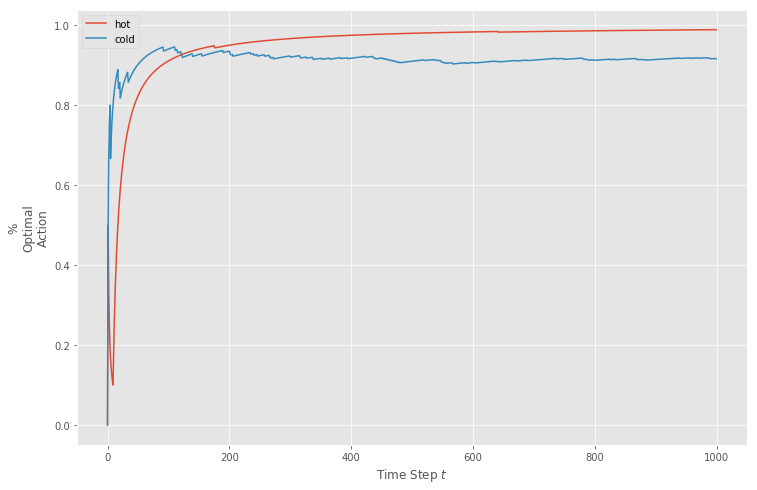

In [157]:
np.random.seed(1)
nBandit = nArmedBandit(10)

hot = WeightedBandit(n=10, bandit=nBandit, epsilon=0, hot_start=15)
cold = WeightedBandit(n=10, bandit=nBandit, epsilon=0.1)

avg_r_hot, opt_a_hot = hot.learn() 
avg_r_cold, opt_a_cold = cold.learn() 

t = np.arange(1000)
plt.plot(t, opt_a_hot)
plt.plot(t, opt_a_cold)
plt.legend(["hot", "cold"])
plt.ylabel("%\nOptimal\nAction")
plt.xlabel("Time Step $t$")
plt.yticks([i for i in np.arange(0, 1.2, 0.2)])
plt.show()

In [158]:
np.round(nBandit.means, 3)

array([-1.66 ,  4.406, -9.998, -3.953, -7.065, -8.153, -6.275, -3.089,
       -2.065,  0.776])

In [159]:
np.round(hot.Q, 3)

array([-0.759,  4.355, -6.712, -2.158, -5.811, -5.247, -4.054, -1.839,
       -0.907,  0.27 ])

In [163]:
np.round(cold.Q, 3)

array([-6.3100e-01,  5.6960e+00, -1.1403e+01, -4.1200e+00, -6.9810e+00,
       -7.8080e+00, -6.0070e+00, -3.5690e+00, -2.2880e+00, -7.0000e-03])

### Upper-Confidence Bound Strategy
Exploration is needed due to the inescapable fact that there is uncertainty in the accuracy of the estimated action-values. The $\epsilon$-greedy strategies so far have shown promise in being able to balance the exploration-vs-exploitation conundrum. However, there is a fatal floor in these agents' strategies; when deciding to select an action that is not considered to be optimal at the time of decision, they select a random action with probability $\epsilon$. Wouldn't it be better to be a bit smarter when exploring and choosing non-greedy actions, selecting actions according to their potential to be optimal?

The upper-confidence bound algorithm follows the spirit of optimism in the face of uncertainty. It takes into account how accurate the estimates of the action-values are, as well as the uncertainty in these estimates:

\begin{equation}
A_t = \underset{a}{\operatorname{argmax}} \Bigg[Q_t(a) + c \sqrt{\frac{log t}{N_t(a)}}\Bigg]
\end{equation}

The value inside the square root measures the uncertainty of the current $Q_t(a)$ action-values. When its high, i.e. when the action hasn't been taken sufficiently often ($N_t(a)$) then the agent will be more inclided to give it a go. It can be thought of a pseudo-exploration bonus, and the value $c$ controls the amount of exploration the agent undertakes. As the agent tries all options to get an understanding of the reward distributions it becomes more and more certain about them, and will learn to exploit the ones with the highest mean reward, choosing the most promising options along the way.

Below are plots of a UCB agent against a standard $\epsilon$-greedy.

In [166]:
baseBandit = nArmedBandit(10) 
bandits_list_6 = [UCBBandit(n=10, bandit=baseBandit, c=2), WeightedBandit(n=10, bandit=baseBandit, epsilon=0.1)]

avg_rewards_6, optimal_actions_6 = learnMultiEpisodes(bandits_list_6)

Executing episode: 0
Executing episode: 100
Executing episode: 200
Executing episode: 300
Executing episode: 400
Executing episode: 500
Executing episode: 600
Executing episode: 700
Executing episode: 800
Executing episode: 900


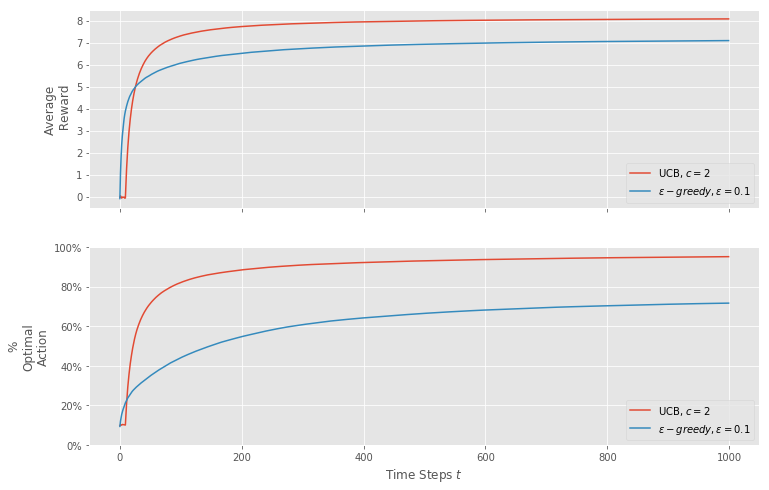

In [167]:
bandit_names_6 = ["UCB, $c=2$" , "$\epsilon-greedy, \epsilon=0.1$"]
plotAgentsLearning(avg_rewards_6, optimal_actions_6, bandit_names_6)

The UCB agent appears to far superior to the best $\epsilon$-greedy agent seen so far. The ability to explore in an informed way gives a significant advantage to the UCB agent, as it learns quicker how to exploit the bandit; by the end of the episode it is picking the optimal action every time.

### Gradient/Softmax Algorithms
So far agents have been choosing their actions in a maximal fashion, in some way or another choosing what they deem to be the best or most promising action at each time step, with caveat that $\epsilon$-greedy agents have some probability of choosing a random action.

This is not the only possible strategy; what about choosing actions according to a distribution and learning a numerical preference for each action $a$, denoted $H_t(a)$. In this setting, the greater the preference the more likely that that action will be chosen. To do this, an agent can select actions according to the softmax distribution:

\begin{equation}
Pr(A_t = a) = \frac{e^{H_t(a)}}{\sum_{b=1}^{k}e^{H_t(a)}} = \pi_t(a)
\end{equation}

where $\pi_t(a)$ is probability of selecting action $a$ at time $t$. The softmax function allows for the preferences to sum to 1, and hence be interpreted as a probaility distribution over actions. With the softmax/gradient agents new and different update equations must be used for $H_t(a)$, with the derivation found in Sutton and Barto on pages 29-31 but with results shown below:

>for action $A_t = a$ selected:
\begin{equation}
H_{t+1}(a) = H_t(A_t) + \alpha(R_t - R^{avg}_{t})(1 - \pi_t(A_t))
\end{equation}

>$\forall A_t \neq a$ not selected:
\begin{equation}
H_{t+1}(a) = H_t(A_t) + \alpha(R_t - R^{avg}_{t})\pi_t(A_t)
\end{equation}

Here $R^{avg}_{t}$ is the average of all rewards thru time $t$ and acts as baseline against to measure new rewards against. If $R_t > R^{avg}_{t}$ then the probability of choosing action $A_t$ in the future is increased, and vise versa if it's less than. Additionally and simultaneously, the probability of choosing non-selected actions when $R_t > R^{avg}_{t}$ is decreased, and clearly vice versa again.

To test this new style of selecting actions, softmax/gradient agents are tested against a simple exponentially weighted-average agent below.

In [171]:
baseBandit = nArmedBandit(10) 
bandits_list_7 = [GradientBandit(n=10, bandit=baseBandit, alpha=0.01), 
                  GradientBandit(n=10, bandit=baseBandit, alpha=0.1),
                  GradientBandit(n=10, bandit=baseBandit, alpha=0.9), 
                  WeightedBandit(n=10, bandit=baseBandit, epsilon=0.1)]

avg_rewards_7, optimal_actions_7 = learnMultiEpisodes(bandits_list_7)

Executing episode: 0
Executing episode: 100
Executing episode: 200
Executing episode: 300
Executing episode: 400
Executing episode: 500
Executing episode: 600
Executing episode: 700
Executing episode: 800
Executing episode: 900


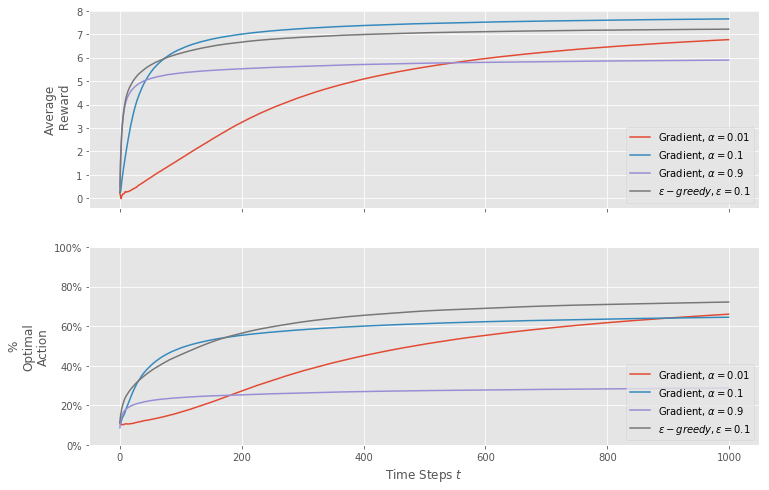

In [173]:
bandit_names_7 = ["Gradient, $\\alpha=0.01$", "Gradient, $\\alpha=0.1$", "Gradient, $\\alpha=0.9$", "$\epsilon-greedy, \epsilon=0.1$"]
plotAgentsLearning(avg_rewards_7, optimal_actions_7, bandit_names_7)

It's clear selecting actions with respect to a probaility distribution over the actions produces greater average rewards and optimal action selection compared to a basic averaging agent. The step-size $\alpha$ seems to have a clear effect in the gradient bandits; when it is too large the action distribution changes too much and cannot converge to the correct values in order for the optimal actions to be selected via the action probabilities.

However, it appears that the despite the higher averaged rewards for the gradient agents, the $\epsilon$-greedy agent is able to choose the optimal action more often. This is possibility due to the action distributions $H_t(a)$ not converging to the correct values, and hence actions being chosen with incorrect probabilities. It appears that maybe the gradient agent with $\alpha=0.01$ mmight eventually outperform the $\epsilon$-greedy agent in terms of optimal action selection if the episode were longer and gave more time for its action distribution $H_t(a)$ to converge.

### Bayesian Algorithms
Continuing with the theme of choosing actions based on distributions, Bayesian agents provide another possibility. Bayesian bandit agents achieve this by assuming some prior distribution for each of the arms' reward distributions.

Assume for a second that a bayesian bandit has gotten a tip from an insider that the underlying reward distributions are in fact normal with variance equal to 1. The bayesian agent now has some form of belief about how to model the rewards. All they need to do is to start with some rough approximation of the reward distribution, take samples from the arms of the bandit and update their beliefs. Simple.

To do this the bayesian agent assumes the prior distributions of the arms rewards are $N(0,1)$, take samples from the bandit's arms, updates their beliefs in order to re-estimate the true distributions $N(\mu_i, 1)$ for arms $i=1,...,k$. To update their beliefs after each pull of an arm the bayesian agent uses the following:

\begin{equation}
\hat{\mu}_{t+1} = \alpha \times R^{avg}_{t}(a)\\
\hat{\sigma}^2_{t+1} = \frac{1}{t+1}
\end{equation}

To actually select actions at each time step, the agent samples a value from each of the $k$ arms modelled reward distributions according to the posterior distributions calculated from the previous step:

\begin{equation}
A_t = \underset{i}{\operatorname{argmax}} \theta_i, \forall \text{arms   } i=1,...,k
\end{equation}

where $\theta_i$ is a single sample from the modelled arm reward distribution $N(\hat{\mu}_{t-1}, \hat{\sigma}^2_{t+1})$. As the time steps increase the variance estimate will asymptotically tend to 1, and the mean with tend to the sample average of rewards for each arm. This technqiue for the estimation of the bandis arm reward distributions is known as Thompson Sampling, and the results of these types of bayesian bandits is shown below.

In [174]:
baseBandit = nArmedBandit(10) 
bandits_list_8 = [BayesianBandit(n=10, bandit=baseBandit, alpha=0.01), 
                  BayesianBandit(n=10, bandit=baseBandit, alpha=0.1),
                  BayesianBandit(n=10, bandit=baseBandit, alpha=0.9), 
                  WeightedBandit(n=10, bandit=baseBandit, epsilon=0.1)]

avg_rewards_8, optimal_actions_8 = learnMultiEpisodes(bandits_list_8)

Executing episode: 0
Executing episode: 100
Executing episode: 200
Executing episode: 300
Executing episode: 400
Executing episode: 500
Executing episode: 600
Executing episode: 700
Executing episode: 800
Executing episode: 900


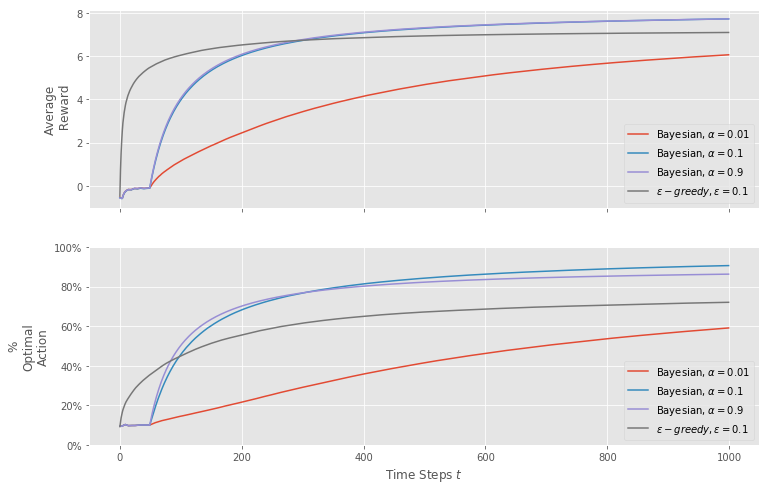

In [176]:
bandit_names_8 = ["Bayesian, $\\alpha=0.01$", "Bayesian, $\\alpha=0.1$", 
                  "Bayesian, $\\alpha=0.9$", "$\epsilon-greedy, \epsilon=0.1$"]
plotAgentsLearning(avg_rewards_8, optimal_actions_8, bandit_names_8)

The bayesian bandits with a step-size of $\alpha=\{0.1,0.9\}$ are able to outperform the $\epsilon$-greedy agent in terms of average rewards and optimal action selection during episodes. After an initial warm-up period where different actions are explored and samples are taken for the different arms, the agents then are able to very accurately measure the true value of the underlying reward distributions and exploit this knowledge. 

Again, when the step-size $\alpha=0.01$ is too small the updates to the modelled reward distributions are too slow and the bayesian agent in this case can't accurately estimate the distributions in the 1000 time steps.

## Agent Strategy Comparison
As a final test it is worth looking to see which one of the agents performs best. 

### Stationary
First the case when the reward distributions of the bandit are stationary. In this instance there are two clear winners; the UCB and bayesian agents excel compared to the gradient agent, and vastly more than the $\epsilon$-greedy agent. Their abilities to explore and model the true values of the bandits reward distribution's means that once they have gained knowledge of the system they can readily exploit it and watch the money flow.

In [205]:
baseBandit = nArmedBandit(10) 
bandits_list_9 = [BayesianBandit(n=10, bandit=baseBandit, alpha=0.1), 
                UCBBandit(n=10, bandit=baseBandit), 
                GradientBandit(n=10, bandit=baseBandit, alpha=0.1),
                WeightedBandit(n=10, bandit=baseBandit, epsilon=0.1, alpha=0.1)]

avg_rewards_9, optimal_actions_9 = learnMultiEpisodes(bandits_list_9)

Executing episode: 0
Executing episode: 100
Executing episode: 200
Executing episode: 300
Executing episode: 400
Executing episode: 500
Executing episode: 600
Executing episode: 700
Executing episode: 800
Executing episode: 900


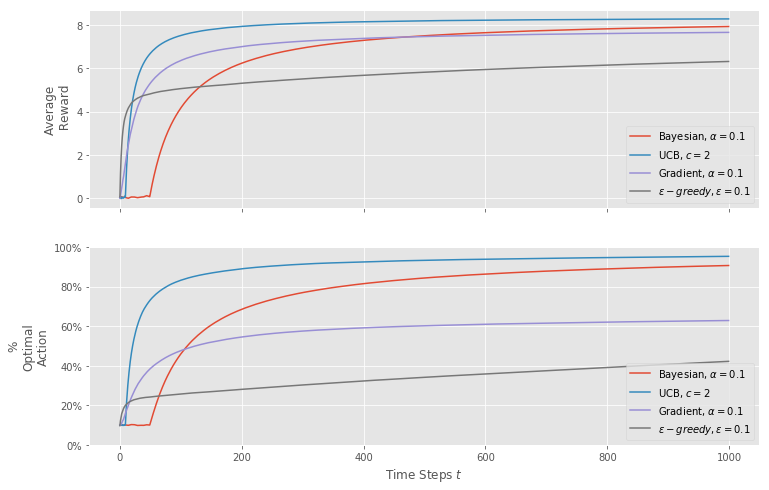

In [206]:
bandit_names_9 = ["Bayesian, $\\alpha=0.1$", 
                  "UCB, $c=2$", 
                  "Gradient, $\\alpha=0.1$",
                  "$\epsilon-greedy, \epsilon=0.1$"]
plotAgentsLearning(avg_rewards_9, optimal_actions_9, bandit_names_9)

### Non-Stationary
Finally it's illuminating to see how these agents fair on non-stationary bandits. To maginify the differences the espiode length is increased from 1,000 time steps to 10,000. This way the agent that is best able to adapt and overcome should come to the fore.

On the non-stationary bandit the bayesian agent is able perform the best in terms of average rewards per episode. However, in terms of making the optimal decision it is not the best. After approximately 3000 time steps it is overtaken by the $\epsilon$-greedy agent that has a more effective strategy of exponentially weighting the rewards in it's updates of its action-values and naturally explores at a constant rate.

The bayesian agent on the otherhand takes a sample mean of the returns and an ever skrinking variance to estimate its posterior gaussian beliefs. As time passes and the mean rewards do their random walks, the sample means for the bayesian agent can less accurately identify the true sample mean value, but intrinsically are more sure about its calculations, due to estimating the reward distributions with a variance of $\frac{1}{t+1}$. Hence, the bayesian agent's ability to correctly identify the optimal agent decreases as the episode ticks by.

The UCB agent, as expected, quickly learns the reward distributions, but as time progresses it is un able to adapt to the walking rewards. This is due to the fact that that the exploration bonus is mainly governed by the term $\frac{log t}{N_t(a)}$, that is not able to respond effectively to the random walks of the means. As the means vary the action-values may become saturated in terms of exploration bonus and the agent behaves less able to correctly identify the moving distributions. More advance methods are available for UCB agents that can act in a dynamic fashion when playing on non-stationary bandits.

In [207]:
baseBandit = nArmedBandit(10) 
bandits_list_10 = [BayesianBandit(n=10, bandit=baseBandit, alpha=0.1), 
                   UCBBandit(n=10, bandit=baseBandit), 
                   GradientBandit(n=10, bandit=baseBandit, alpha=0.1),
                   WeightedBandit(n=10, bandit=baseBandit, epsilon=0.1, alpha=0.1)]

avg_rewards_10, optimal_actions_10 = learnMultiEpisodes(bandits_list_10, isStationary=False, episode_len=10000)

Executing episode: 0
Executing episode: 100
Executing episode: 200
Executing episode: 300
Executing episode: 400
Executing episode: 500
Executing episode: 600
Executing episode: 700
Executing episode: 800
Executing episode: 900


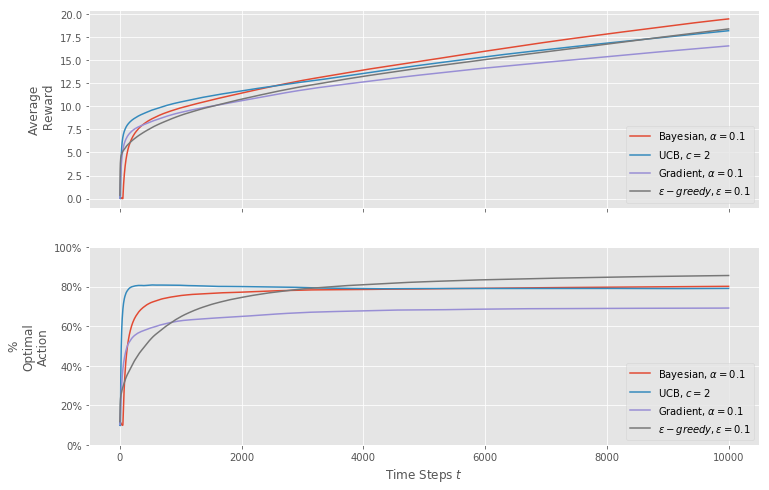

In [208]:
bandit_names_10 = ["Bayesian, $\\alpha=0.1$", 
                   "UCB, $c=2$", 
                   "Gradient, $\\alpha=0.1$",
                   "$\epsilon-greedy, \epsilon=0.1$"]
plotAgentsLearning(avg_rewards_10, optimal_actions_10, bandit_names_10)